In [1]:
# pip install pandas
# nltk.download('punkt_tab')

In [2]:
# pip install pandas

In [3]:
# pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
lemma = WordNetLemmatizer()

In [5]:
df = pd.read_csv("..\Text_Representation\Conunter_TF_IDF\IMDB Dataset.csv")

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# pip install nltk

In [8]:
import re
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\ABDULLAH AL
[nltk_data]     MASUM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
chat_words = {
    "A3": "Anytime, Anywhere, Anyplace",
    "ADIH": "Another Day In Hell",
    "AFK": "Away From Keyboard",
    "AFAIK": "As Far As I Know",
    "ASAP": "As Soon As Possible",
    "ASL": "Age, Sex, Location",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "BAE": "Before Anyone Else",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRUH": "Bro",
    "BRT": "Be Right There",
    "BSAAW": "Big Smile And A Wink",
    "BTW": "By The Way",
    "BWL": "Bursting With Laughter",
    "CSL": "Can’t Stop Laughing",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "DM": "Direct Message",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FIMH": "Forever In My Heart",
    "FOMO": "Fear Of Missing Out",
    "FR": "For Real",
    "FWIW": "For What It's Worth",
    "FYP": "For You Page",
    "FYI": "For Your Information",
    "G9": "Genius",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GMTA": "Great Minds Think Alike",
    "GN": "Good Night",
    "GOAT": "Greatest Of All Time",
    "GR8": "Great",
    "HBD": "Happy Birthday",
    "IC": "I See",
    "ICQ": "I Seek You",
    "IDC": "I Don’t Care",
    "IDK": "I Don't Know",
    "IFYP": "I Feel Your Pain",
    "ILU": "I Love You",
    "ILY": "I Love You",
    "IMHO": "In My Honest Opinion",
    "IMU": "I Miss You",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "IYKYK": "If You Know, You Know",
    "JK": "Just Kidding",
    "KISS": "Keep It Simple, Stupid",
    "L": "Loss",
    "L8R": "Later",
    "LDR": "Long Distance Relationship",
    "LMK": "Let Me Know",
    "LMAO": "Laughing My Ass Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "M8": "Mate",
    "MFW": "My Face When",
    "MID": "Mediocre",
    "MRW": "My Reaction When",
    "MTE": "My Thoughts Exactly",
    "NVM": "Never Mind",
    "NRN": "No Reply Necessary",
    "NPC": "Non-Player Character",
    "OIC": "Oh I See",
    "OP": "Overpowered",
    "PITA": "Pain In The Ass",
    "POV": "Point Of View",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
    "RN": "Right Now",
    "SK8": "Skate",
    "STATS": "Your Sex And Age",
    "SUS": "Suspicious",
    "TBH": "To Be Honest",
    "TFW": "That Feeling When",
    "THX": "Thank You",
    "TIME": "Tears In My Eyes",
    "TLDR": "Too Long, Didn’t Read",
    "TNTL": "Trying Not To Laugh",
    "TTFN": "Ta-Ta For Now",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    'R' : 'are',
    "U4E": "Yours For Ever",
    "W": "Win",
    "W8": "Wait",
    "WB": "Welcome Back",
    "WTF": "What The Fuck",
    "WTG": "Way To Go",
    "WUF": "Where Are You From",
    "WYD": "What You Doing",
    "WYWH": "Wish You Were Here",
    "ZZZ": "Sleeping, Bored, Tired"
}


In [11]:
# pip install textblob

In [12]:
def chat_words_process(text):
  new_text = []
  for word in text.split():
    if word.upper() in chat_words:
      new_text.append(chat_words[word.upper()])
    else:
      new_text.append(word)
  
  return " ".join(new_text).lower()


In [13]:

# from textblob import TextBlob
# def spelling_correction(text):
#   textblb = TextBlob(text)
#   return textblb.correct().string


In [14]:
def Text_procecess(text):

  text = text.lower()
  text = re.sub(r'<.*?>', " ", text)
  text = re.sub(r"https?://\S+|www\.\S+", " ", text)
  text = re.sub(r'[^\w\s]', '', text)

  # Chat words
  text = chat_words_process(text)

  # Spelling correction (optional, slow)
  # text = spelling_correction(text)

  # Tokenization
  token = word_tokenize(text)

  # Lemmatization
  text = [lemma.lemmatize(w, pos = 'v') for w in token] 

  # Stopword removal
  text = [w for w in text if w not in stop_words] # stop word remove

  return " ".join(text)

In [15]:
sentence = "The children are playing better games and aslo W"
print(Text_procecess(sentence))

children play better game aslo win


In [16]:
sentence = "The children are playing better games"
print(Text_procecess(sentence))

children play better game


In [17]:
df['clean_comment'] = df['review'].apply(Text_procecess)

In [18]:
df.head()

,review,sentiment,clean_comment
0,One of the other reviewers has mentioned that ...,positive,one reviewers mention watch 1 oz episode youll...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend tear eye hot summer ...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake think ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love tear eye money visually st...


In [19]:
# pip install scikit-learn

In [20]:
tfidf = TfidfVectorizer(max_features=10000)

In [21]:
X = tfidf.fit_transform(df['clean_comment'])

In [22]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(50000, 10000))

In [23]:

le  = LabelEncoder()

In [24]:
Y = le.fit_transform(df['sentiment'])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state= 42)

In [26]:
Log_reg = LogisticRegression()

In [27]:
model = Log_reg.fit(x_train, y_train)

In [28]:
y_pred = model.predict(x_test)

In [29]:
model.score(x_train, y_train)

0.9205

In [30]:
model.score(x_test, y_test)

0.893

In [31]:
accuracy_score(y_pred, y_test)

0.893

In [32]:
confusion_matrix(y_pred, y_test)

array([[4361,  470],
       [ 600, 4569]])

In [33]:
def sentiment(text):
  cleaned = Text_procecess(text)
  vector = tfidf.transform([cleaned]) # TF-IDF wants list
  prediction = model.predict(vector)[0]
  return le.inverse_transform([prediction])[0] # convert 

# LabelEncoder.inverse_transform converts numeric labels predicted by the model back to their original categorical string labels.

In [34]:
sentiment("Worst movie ever")

'negative'

In [35]:
le.classes_

array(['negative', 'positive'], dtype=object)

In [36]:
c = Text_procecess("This movie is amazing")
v = tfidf.transform([c])
p = model.predict(v)

In [37]:
v.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 10000))

In [38]:
p[0]

np.int64(1)

In [39]:
le.inverse_transform([p])[0]

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'positive'

In [47]:
# pip install wordcloud

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def create_cloud(string, title =None):
    cloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    max_words=100,
        stopwords = stop_words
    ).generate(string)

    # 3. Plot the WordCloud image
    plt.figure(figsize=(10, 5)) # Set figure size
    plt.imshow(cloud, interpolation='bilinear') # Display the image smoothly
    plt.axis("off") # Hide axes
    if title:
        plt.title(title, fontdict={"fontsize": 15})
    plt.show()

In [49]:
df.columns

Index(['review', 'sentiment', 'clean_comment'], dtype='object')

In [50]:
pos_sen = list(df[df['sentiment'] == 'positive']['clean_comment'])
neg_sen = list(df[df['sentiment'] == 'negative']['clean_comment'])

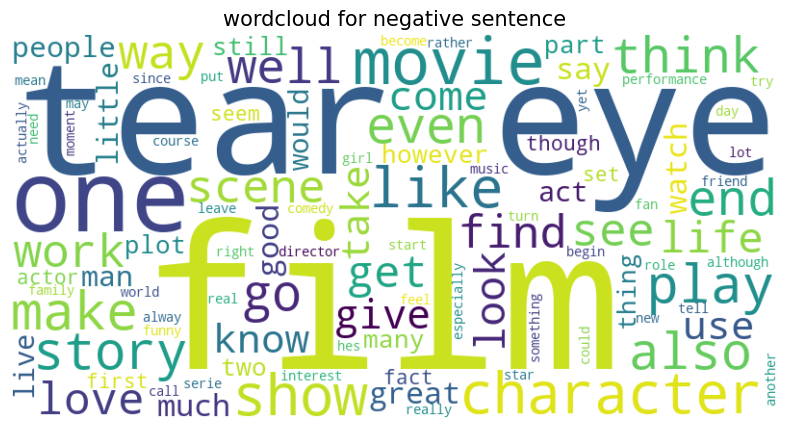

In [51]:
create_cloud(" ".join(pos_sen), "wordcloud for negative sentence")

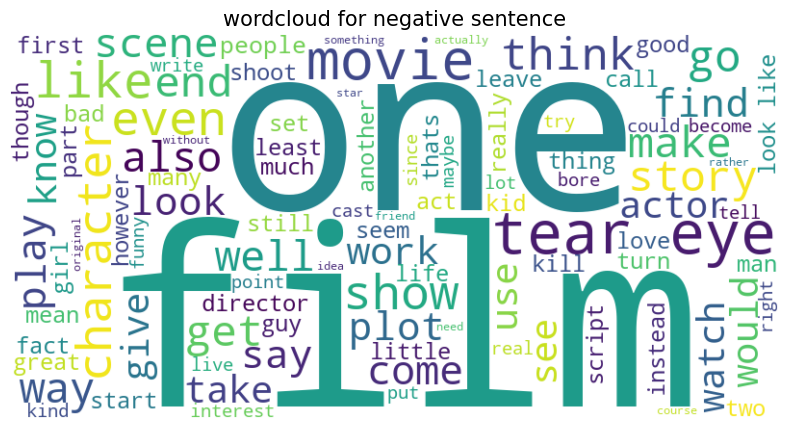

In [ ]:
create_cloud(" ".join(neg_sen), "wordcloud for negative sentence")

In [53]:
import pickle

In [55]:
with open("sentiment.pkl", "wb") as f:
  pickle.dump(model, f)